<a href="https://colab.research.google.com/github/Aglaw-Abdennacer/My_Pong/blob/master/Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import pandas as pd
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# uploading data
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [ ]:
# convert the file to a pandas data frame 
app_df = pd.read_csv(io.BytesIO(uploaded['googleplaystore.csv']))
app_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# definir les x et y comme la variable categorie'index et categorie  pour avour une vue generale sur cette var
y = app_df['Category'].value_counts().index
x = app_df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])






In [ ]:
# on remarque que les variable onr des valeurs non fixé comme installs a des symbole comme + , donc il faut 
# clean la dataset 

#checking if there is any null values and 
app_df.isnull().sum()


# les nformation sur les variables 
def printinfo():
    temp = pd.DataFrame(index=app_df.columns)
    temp['data_type'] = app_df.dtypes
    temp['null_count'] = app_df.isnull().sum()
    temp['unique_count'] = app_df.nunique()
    return temp
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [ ]:
# apres la remarque sur les informations de chaque variable alors 
# 1 / eviter/fill les case null comencons par la variable type 
null_type = app_df[app_df['Type'].isnull()]
null_type.Type = 'type'
null_type
app_df['Type'].fillna("type", inplace = True)
#2 variabe content rating 
app_df.dropna(subset = ['Content Rating'], inplace=True)



In [ ]:
#app_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)
modeValueRating = app_df['Rating'].mode()
app_df['Rating'].fillna(value=modeValueRating[0], inplace = True)

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,3
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [ ]:
# maintenant pour le data type on remarque que plusieurs variables sont des objet et ca va nous cause des problems 
# 1 comencons par installs 
app_df['Installs'] = app_df.Installs.apply(lambda x: x.strip('+'))
app_df['Installs'] = app_df.Installs.apply(lambda x: x.replace(',', ''))
app_df['Installs'] = app_df.Installs.replace('Free' , 0)
#app_df = app_df.drop(app_df.index[10472])
app_df['Installs'] = pd.to_numeric(app_df['Installs'])

In [ ]:
#2 size 
app_df['Size'] = app_df.Size.apply(lambda x: x.strip('+'))
app_df['Size'] = app_df.Size.apply(lambda x: x.replace(',', ''))
app_df['Size'] = app_df.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega
app_df['Size'] = app_df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo
app_df['Size'] = app_df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo
app_df['Size'] = app_df.Size.replace('Varies with device', np.NaN)
app_df['Size'] = pd.to_numeric(app_df['Size']) # Converting the string to Numeric type

In [ ]:
# variables reviews 
app_df['Reviews'] = app_df.Reviews.astype(int)
app_df['Price'] = app_df.Price.apply(lambda x: x.strip('$'))
app_df['Price'] = pd.to_numeric(app_df['Price'])

In [ ]:
cleaned = app_df
cleaned.to_csv("E:\S2\analyse donne\cleaned_data.csv")


In [ ]:
app_df.head(5)
# compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.
#Positive values shows as one variable increases other variable increases as well. Negative values shows 
#as one variable increases other variable decreases.Bigger the values,more strongly two varibles are correlated and viceversa
app_df.corr()


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.058402,0.054812,0.040027,-0.018421
Reviews,0.058402,1.000000,0.238215,0.643122,-0.009667
Size,0.054812,0.238215,1.000000,0.164787,-0.023006
Installs,0.040027,0.643122,0.164787,1.000000,-0.011689
Price,-0.018421,-0.009667,-0.023006,-0.011689,1.000000


In [ ]:
# ths shows how every variable changes relating to the price variable 
# so as we see the number of intalls for example is increasing relating tp the price is the price is increasing the installs descreases 
# and it is obvious on the heatmap too 
total_installs = app_df.groupby('Installs').sum()
total_installs

,Rating,Reviews,Size,Price
Installs,,,,
0,66.0,0,1.824000e+08,1205.41
1,296.6,20,9.110700e+08,179.29
5,362.7,44,1.093260e+09,71.38
10,1713.9,419,5.219961e+09,447.76
50,903.1,486,3.293259e+09,109.72
100,3152.3,3906,9.658367e+09,837.76
500,1407.1,4065,3.937207e+09,134.62
1000,3753.2,34869,1.256785e+10,2662.56
5000,1936.6,48130,6.376225e+09,1437.96


In [ ]:
# dans le size suprimer les nouveaus valeurs nulles 
app_df.dropna(subset = ['Size'], inplace=True)

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [ ]:
app_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [ ]:
app_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068608,0.054812,0.041273,-0.018146
Reviews,0.068608,1.000000,0.238215,0.627720,-0.009839
Size,0.054812,0.238215,1.000000,0.164787,-0.023006
Installs,0.041273,0.627720,0.164787,1.000000,-0.010481
Price,-0.018146,-0.009839,-0.023006,-0.010481,1.000000


Text(0.5, 1.0, 'Correlation entre les differentes variables quantitatives de notre dataset ')

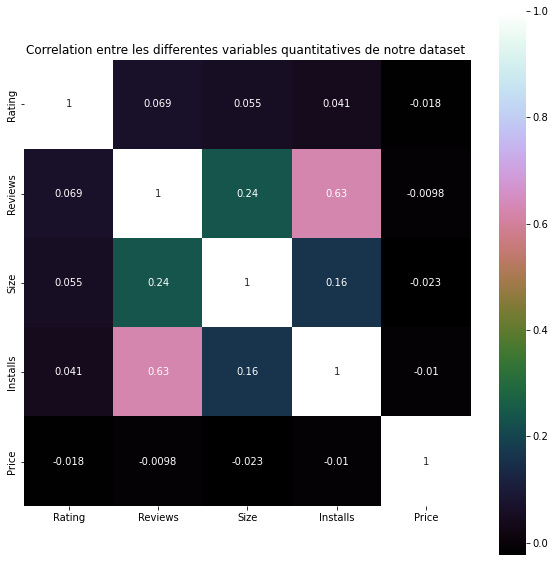

In [ ]:
# trying to visualize this correlation on a heatmap that shows the correlation beteween each variable 
correlation = app_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation entre les differentes variables quantitatives de notre dataset ')

In [ ]:
pip install fanalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.5 MB/s 


In [ ]:
temp_data = {
    "Installs" : app_df['Installs'] , 
    "Rating" : app_df['Rating'], 
    "Reviews" : app_df['Reviews'],
    "Size" : app_df['Size'],
    "Price" : app_df['Price']
}
temp = pd.DataFrame(temp_data)
temp.head(5)
temp.shape


(9145, 5)

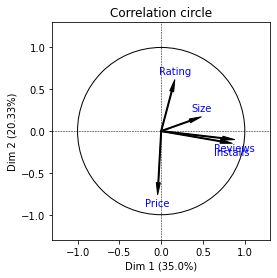

In [ ]:
from fanalysis.pca import PCA
pca.explained_variance_ratio_
my_pca = PCA(std_unit=True, row_labels=temp.index.values , col_labels=temp.columns.values)
my_pca2 = PCA(std_unit=True , row_labels=temp.index.values , col_labels = temp.values )
X = temp.to_numpy()
my_pca.fit(X)
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = temp.to_numpy()
pca.fit(x)
pca.explained_variance_ratio_

array([0.81337571, 0.1859712 ])

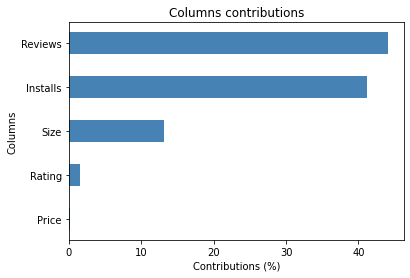

In [ ]:
my_pca.plot_col_contrib(num_axis = 1)

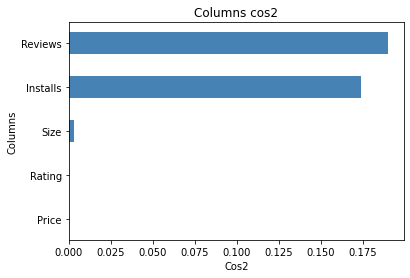

In [ ]:
# cos2 nous permet de connaitre la qualiter de prsentation des variables sur le plan 
my_pca.plot_col_cos2(num_axis = 0)

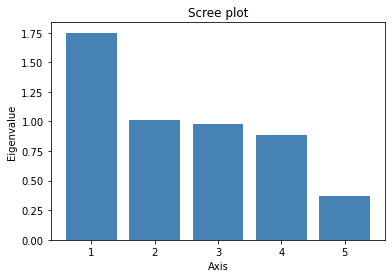

In [ ]:
my_pca.plot_eigenvalues()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(temp)
scaled_data = scaler.transform(temp)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape
temprory = app_df.groupby('Category').sum()
temprory

,Rating,Reviews,Size,Installs,Price
Category,,,,,
ART_AND_DESIGN,270.5,1087343,7.670000e+08,99338100,5.97
AUTO_AND_VEHICLES,314.1,992322,1.502786e+09,43770211,11.48
BEAUTY,202.8,186856,6.484000e+08,13696950,0.00
BOOKS_AND_REFERENCE,855.3,4054428,2.622232e+09,139962076,116.78
BUSINESS,1691.1,6144960,5.788865e+09,536078560,172.28
COMICS,211.2,616194,6.877530e+08,17586150,0.00
COMMUNICATION,1103.3,117104633,3.118177e+09,4941943051,68.18
DATING,856.3,3900505,3.524618e+09,141880807,23.45
EDUCATION,487.0,7079451,2.307782e+09,278802000,17.96


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(temprory)
scaled_data = scaler.transform(temprory)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

(33, 2)

Text(0, 0.5, 'Deuxième composant principal')

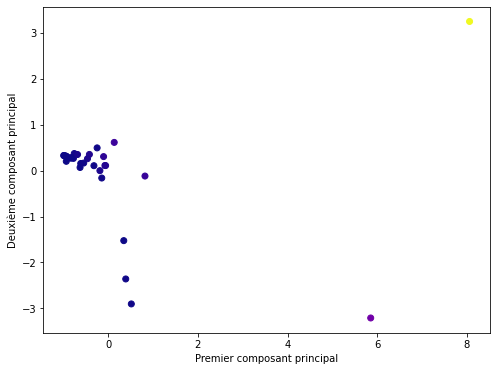

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=temprory['Reviews'],cmap='plasma' )
plt.xlabel('Premier composant principal')
plt.ylabel('Deuxième composant principal')

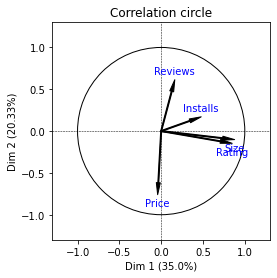

In [ ]:
from fanalysis.pca import PCA
pca.explained_variance_ratio_
my_pca = PCA(std_unit=True, row_labels=temprory.index.values , col_labels=temprory.columns.values)
my_pca2 = PCA(std_unit=True , row_labels=temprory.index.values , col_labels = temprory.values )
X = temp.to_numpy()
my_pca.fit(X)
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2)

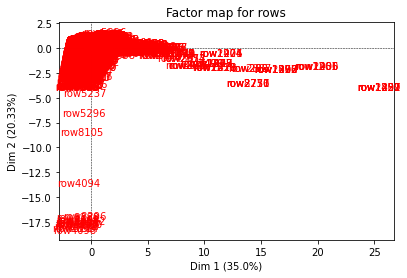

In [ ]:
my_pca.mapping_row(num_x_axis = 1  , num_y_axis= 2)

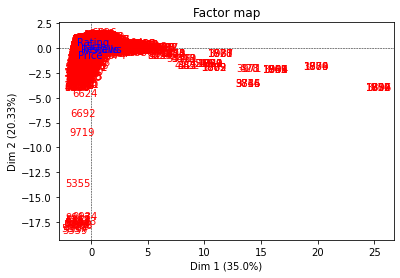

In [ ]:
my_pca.mapping(num_x_axis = 1  , num_y_axis= 2)

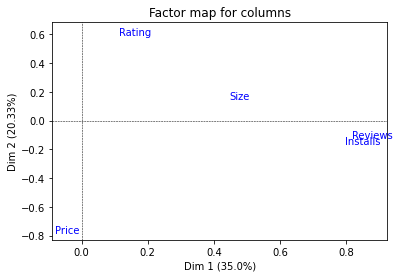

In [ ]:
my_pca.mapping_col(num_x_axis = 1  , num_y_axis= 2)

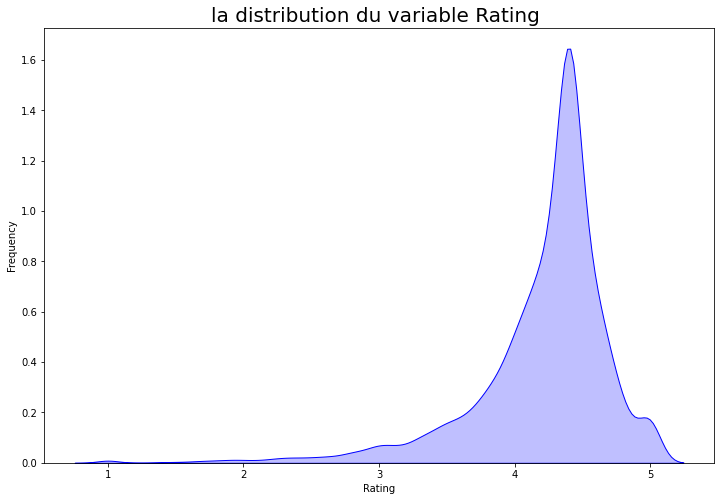

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(app_df.Rating, color="Blue", shade = True)
plt.title('la distribution du variable Rating ',size = 20);

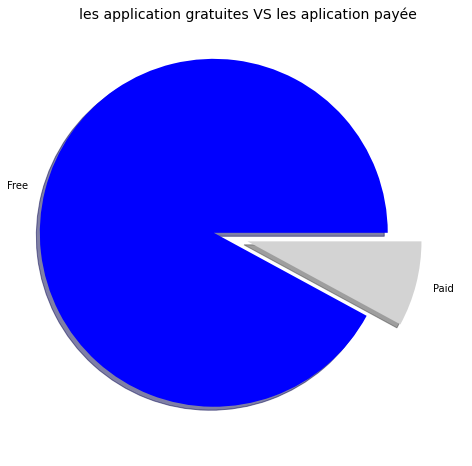

In [ ]:
eigval = (n-1)/n*acp.explained_variance_plt.figure(figsize=(8,8))
labels = app_df['Type'].value_counts(sort = True).index
sizes = app_df['Type'].value_counts(sort = True)
colors = ["blue","lightgray"]
explode = (0.2,0)
plt.pie(explode= explode , x = sizes , labels=labels, colors=colors, startangle=0 , shadow=True)
plt.title('les application gratuites VS les aplication payée',size = 14)
plt.show()

In [ ]:
#ANOVA 
t = {
    "Price" : app_df.Price , 
    "Installs" : app_df.Installs
}
anova_data = pd.DataFrame(t)
anova_data.head()


,Price,Installs
0,0.0,10000
1,0.0,500000
2,0.0,5000000
3,0.0,50000000
4,0.0,100000
